In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

file_path = "/Users/marchen/Desktop/programming/AI/Third week/file/diabetes.csv"
df = pd.read_csv(file_path)

X = df.drop(columns = ['BMI'])
Y = df['BMI']

#### X는 입력 데이터 셋(feature) -> 머신 러닝 모델에 학습시킬 데이터(특징)
#### Y는 정답 데이터 셋(label) -> 예측하려는 목표 값

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df = df.drop(columns = ['Outcome'])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
# 결측치 제거
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

### 결측치 제거하는 이유
1. 머신 러닝은 숫자 데이터를 받아 학습한다.
2. 결측치가 있으면 계산할 수 없는 값(NaN)이 포함 된다.
3. 통계적 분석을 할 때 결측치가 데이터 분석 정확도를 저하시킨다.
4. 결측치가 많으면 모델은 일부 데이터를 학습 못해 예측력이 떨어진다.
5. 모델 훈련 과정에서 오류가 발생한다.

In [7]:
# train, test 분류
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 43)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(537, 8) (537,)
(231, 8) (231,)


#### X_train : 훈련 데이터 셋(입력값) - test_size=0.3으로 하여 전체의 70%를 훈련 데이터로 사용
#### X_test : 테스트 데이터 셋(입력값) - X_train에 제외된 훈련되지 않은 나머지 데이터 30%
#### y_train : 훈련 데이터 셋(출력값) - X_train에 대한 정답 값
#### y_test : 훈련 데이터 셋(출력값) - X_test에 대한 정답 값

#### ----------------------------------------

### MSE값이 크다고 문제가 되는 것은 아니지만 1보다 크게 나온 이유는 스케일링 과정을 하지 않은 경우와 DT 모델은 스케일링 영향이 크지 않다.

In [8]:
# 데이터 스케일링

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# DT

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# DT 모델 학습
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = dt_model.predict(X_test_scaled)
dt_mse = mean_squared_error(y_test, y_pred)

print(f"DT 예측값 : {y_pred[:5]}")
print(f"DT MSE : {dt_mse:.4f}")

DT 예측값 : [27.8 25.2 29.7 30.2 32.9]
DT MSE : 64.4992


### RMSE는 실제 단위와 같은 스케일 값으로 변환한 오차값이다. #### 5 ~ 10 사이 값이 정상값

In [23]:
dt_rmse = dt_mse ** 0.5 # RMSE는 MSE의 제곱근

print(f"DT RMSE : {dt_rmse:.4f}")

DT RMSE : 8.0311


In [21]:
# RF

from sklearn.ensemble import RandomForestRegressor

# RF 모델 학습
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, y_pred)
print(f"RF 예측값 : {y_pred[:5]}")
print(f"RF MSE : {rf_mse:.4f}")

RF 예측값 : [30.373 26.713 31.106 32.279 37.032]
RF MSE : 38.2899


In [15]:
# LF
from sklearn.linear_model import LinearRegression

# LF 모델 학습
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, y_pred)
print(f"LF 예측값 : {y_pred[:5]}")
print(f"LF MSE : {lr_mse : .4f}")

LF 예측값 : [27.02152986 30.83141152 30.06060067 32.61984792 38.28002057]
LF MSE :  44.5012


### DT와 RF과 같은 트리 기반 모델은 스케일링 영향을 받지 않는다.
#### 데이터의 크기보다 특성 구간과 순서가 중요하기 때문이다.

### 다만 거리 기반 모델(SVM,KNN 등)은 스케일링이 필요하다.

In [18]:
# SVM

from sklearn.svm import SVR

# SVM 모델 학습
svm_model = SVR(kernel = 'rbf') # 연속적인 데이터엔 rbf가 비선형 데이터로 변환하여 복잡 관계를 학습할 수 있다. 특히 BMI와 같은 의료 데이터
svm_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = svm_model.predict(X_test_scaled)
svm_mse = mean_squared_error(y_test, y_pred)
print(f"SVM 예측값 : {y_pred[:5]}")
print(f"SVM MSE : {svm_mse : .4f}")

SVM 예측값 : [30.86556429 31.48540113 29.97148672 30.54403523 36.21685666]
SVM MSE :  42.7878


In [19]:
# KNN

from sklearn.neighbors import KNeighborsRegressor

# KNN 회귀 모델 학습
knn_model = KNeighborsRegressor(n_neighbors=5) # 데이터 포인트에서 가장 가까운 이웃을 참고해 값을 예측 - 여기선 5개로
knn_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = knn_model.predict(X_test_scaled)
knn_mse = mean_squared_error(y_test, y_pred)

print(f"KNN 예측값 : {y_pred[:5]}")
print(f"KNN MSE : {knn_mse:.4f}")

KNN 예측값 : [33.04 29.44 30.38 29.88 37.88]
KNN MSE : 40.5787


### BMI 평균값과 각 모델들의 MSE값 비교하기
#### 평균값과 MSE값을 비교할 때 평균보다 크면 모델 성능이 좋지 않음

In [24]:
bmi = df['BMI'].mean()
print(f"BMI 평균 : {bmi:.4f}\n\n")
print(f"DT MSE : {dt_mse:.4f}\n")
print(f"RF MSE : {rf_mse:.4f}\n")
print(f"LF MSE : {lr_mse:.4f}\n")
print(f"SVM MSE : {svm_mse:.4f}\n")
print(f"KNN MSE : {knn_mse:.4f}")

BMI 평균 : 31.9926


DT MSE : 64.4992

RF MSE : 38.2899

LF MSE : 44.5012

SVM MSE : 42.7878

KNN MSE : 40.5787


### 좀 더 직관적으로 보기 편하게 RMSE로 값을 바꿔보자

In [25]:
# RMSE는 MSE의 제곱근

dt_rmse = dt_mse ** 0.5
rf_rmse = rf_mse ** 0.5
lr_rmse = lr_mse ** 0.5
svm_rmse = svm_mse ** 0.5
knn_rmse = knn_mse ** 0.5

print(f"DT RMSE : {dt_rmse:.4f}\n")
print(f"RF RMSE : {rf_rmse:.4f}\n")
print(f"LF RMSE : {lr_rmse:.4f}\n")
print(f"SVM RMSE : {svm_rmse:.4f}\n")
print(f"KNN RMSE : {knn_rmse:.4f}")

DT RMSE : 8.0311

RF RMSE : 6.1879

LF RMSE : 6.6709

SVM RMSE : 6.5412

KNN RMSE : 6.3701


### RMSE 값은 BMI에서 평균적으로 (RMSE)kg/m² 정도 차이가 난다는 의미이다.

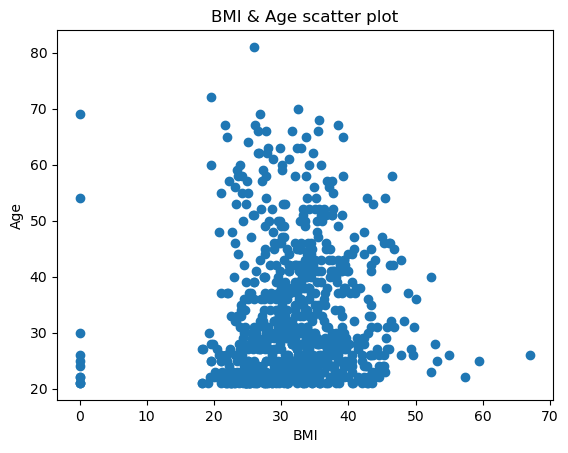

In [29]:
# 산점도 확인

import matplotlib.pyplot as plt

plt.scatter(df['BMI'], df['Age']) # BMI와 Age 간의 관계를 시각화
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('BMI & Age scatter plot')

plt.show()